# Explore here

In [2]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


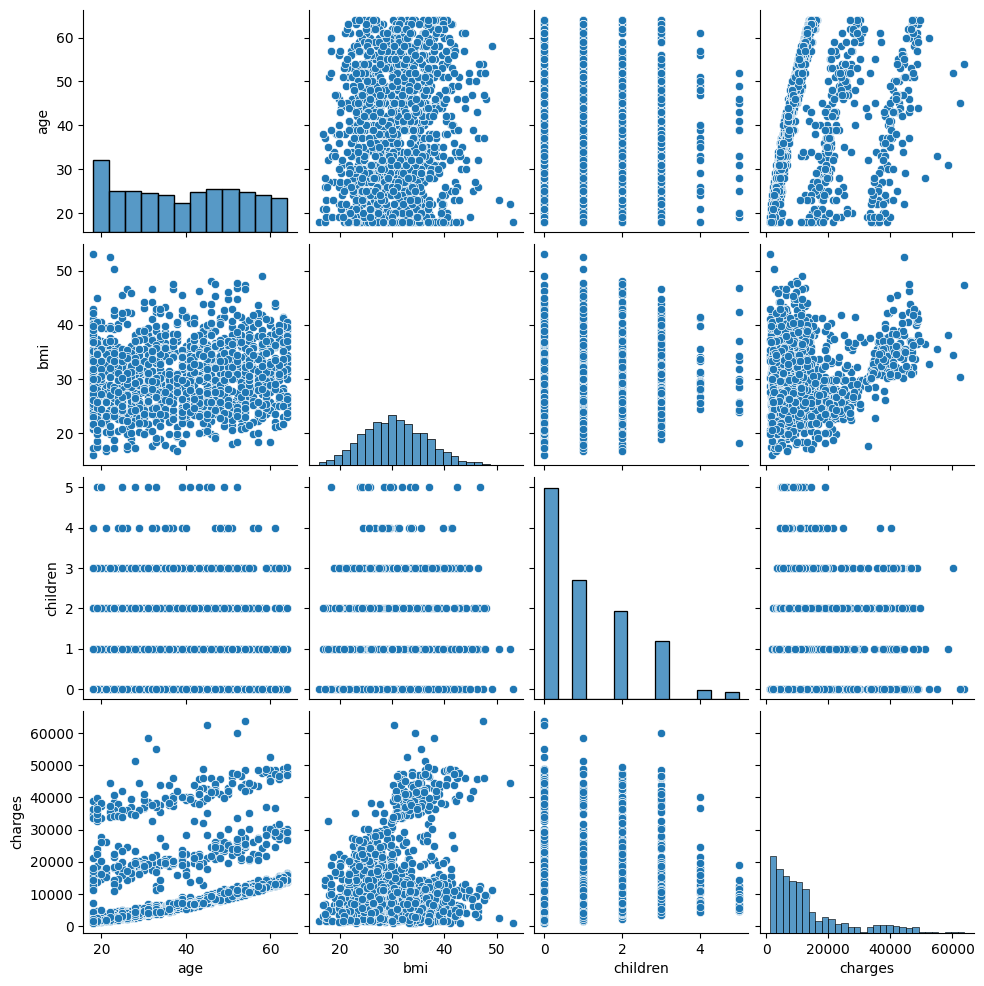

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

In [9]:
df['sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]

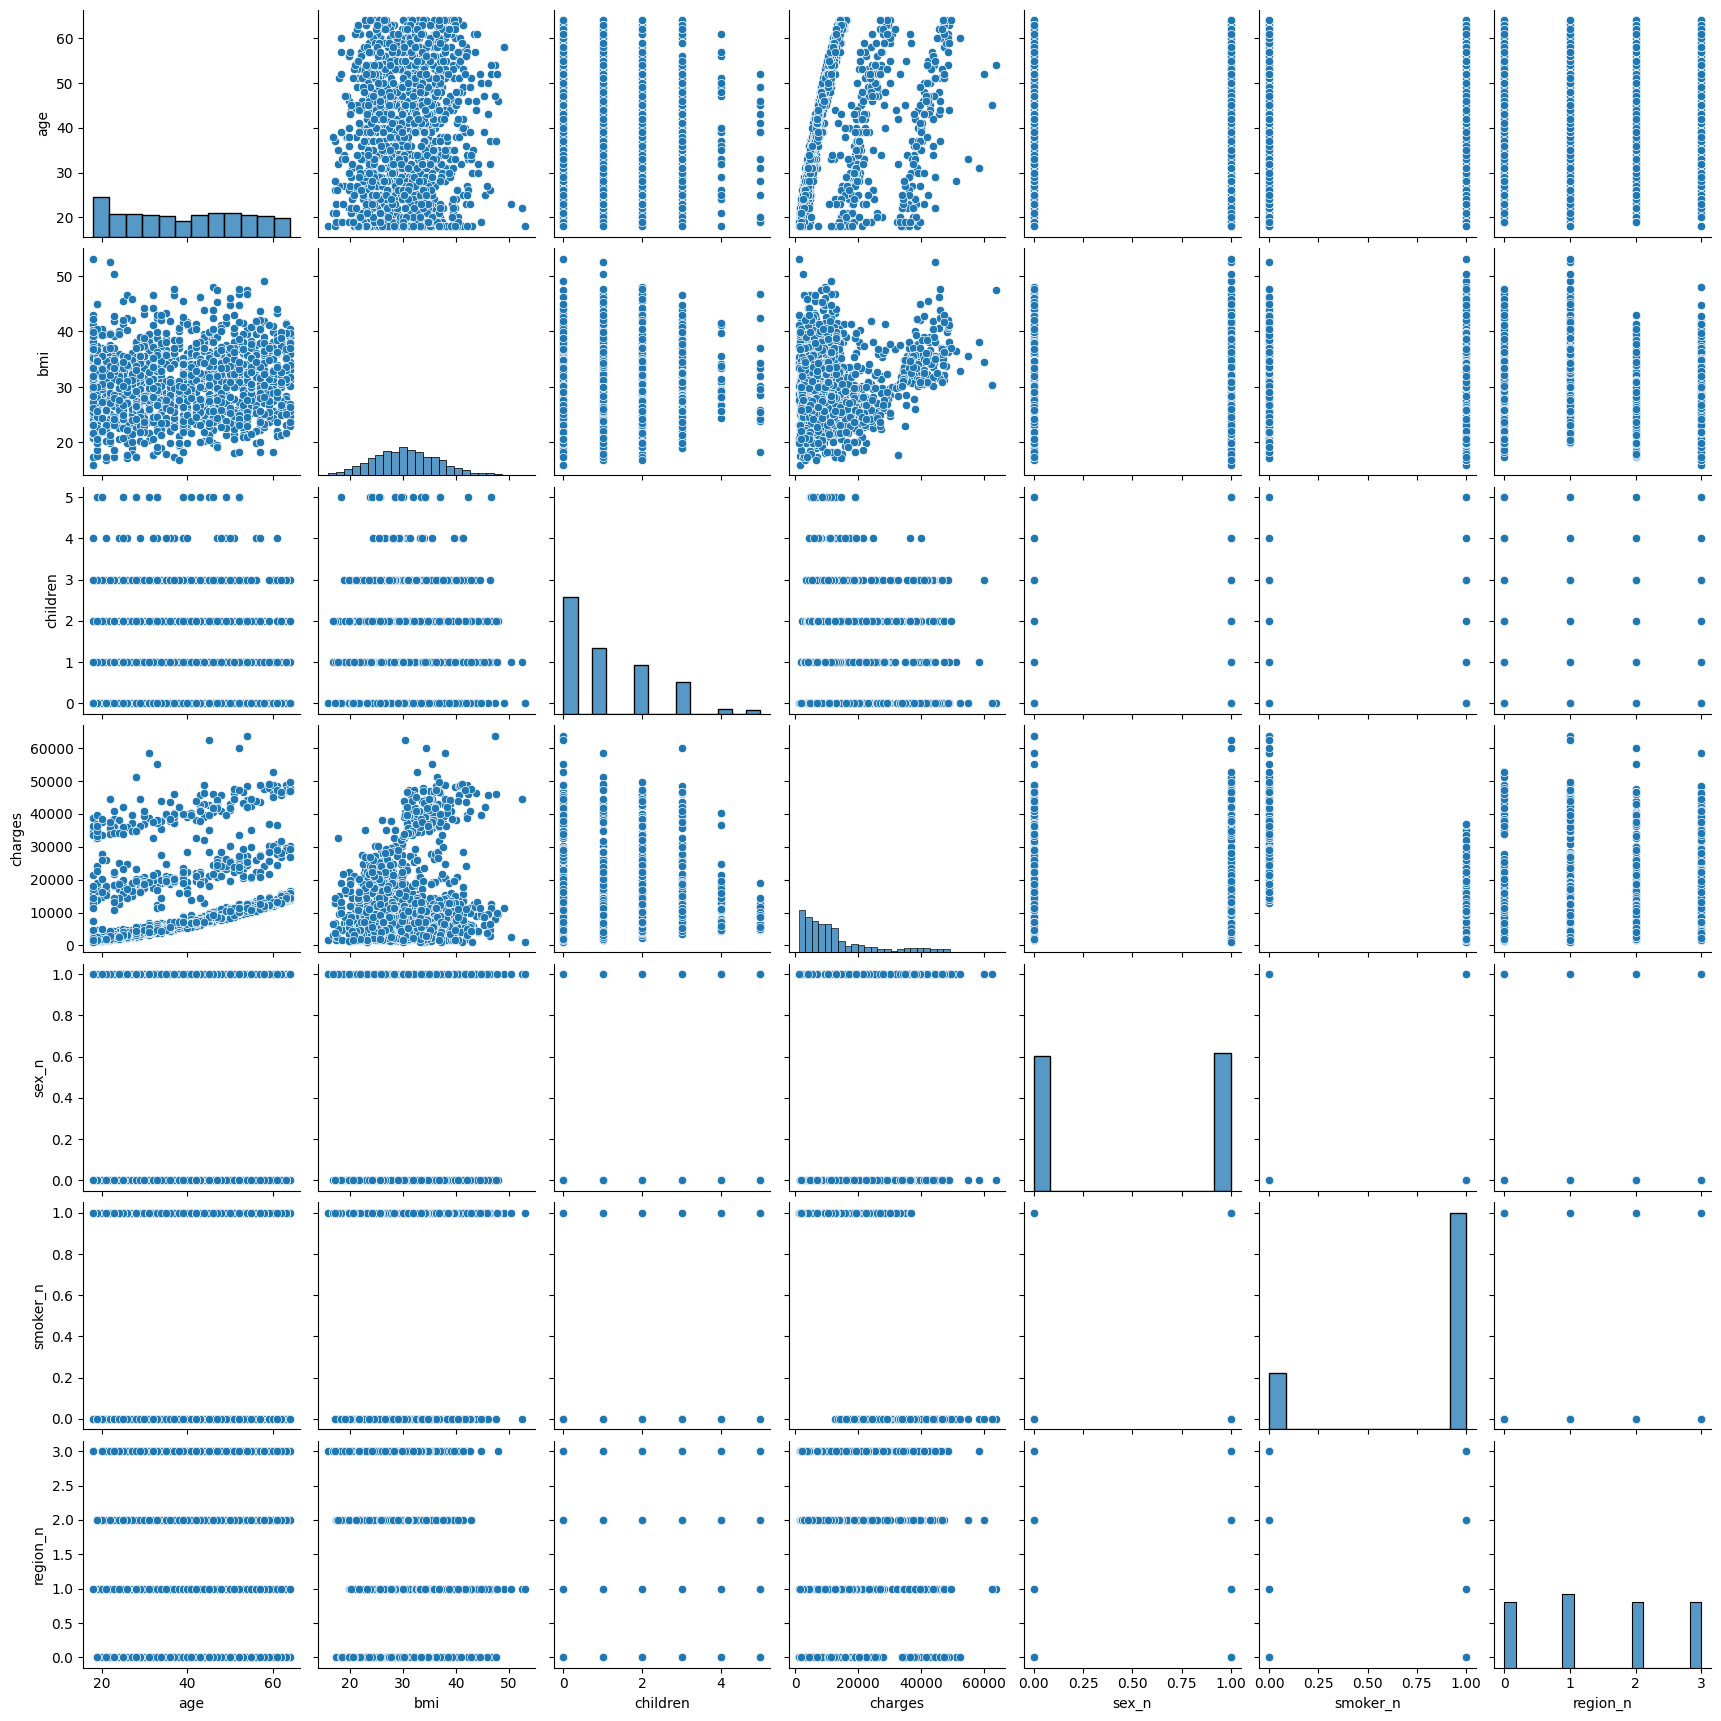

In [10]:
sns.pairplot(df)

In [11]:
df_f = df[['sex_n', 'age', 'bmi', 'children', 'smoker_n', 'region_n', 'charges']]
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


In [14]:
from sklearn.model_selection import train_test_split

X = df_f.drop('charges', axis=1)
y = df_f['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

